In [1]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.ndimage
import scipy
from scipy import signal

In [2]:
image = cv2.imread('eleph.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('eleph2.jpg', quant)
image2=cv2.imread('eleph.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

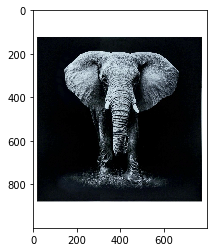

In [3]:
plt.imshow(image)


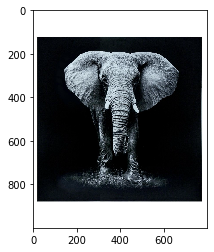

In [4]:
plt.imshow(image2)

In [5]:
def segm(x):
    image = cv2.imread('lion.jpg')
    (h1, w1) = image.shape[:2]

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image = image.reshape((image.shape[0] * image.shape[1], 3))

    clt = KMeans(n_clusters = x)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

    #reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))
    plt.figure(figsize=(14,20))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(quant)
    return plt.show()

In [6]:
interact(segm, x=widgets.IntSlider(min=1, max=10, step=1, value=2))

interactive(children=(IntSlider(value=2, description='x', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.segm(x)>

In [7]:
import skimage.io
import matplotlib.pyplot as plt
img_path="lion.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(mode):
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.figure(figsize=(18,24))
    plt.show()

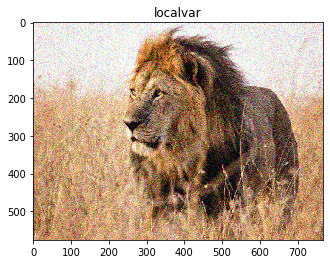

<Figure size 1296x1728 with 0 Axes>

In [8]:
plotnoise("localvar")

In [9]:
interact(plotnoise,mode=["gaussian","localvar","salt","s&p","poisson"])

interactive(children=(Dropdown(description='mode', options=('gaussian', 'localvar', 'salt', 's&p', 'poisson'),…

<function __main__.plotnoise(mode)>

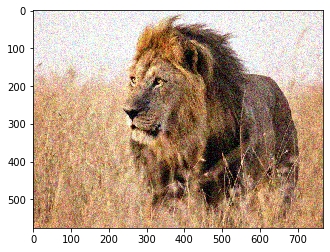

In [10]:
gimg = skimage.util.random_noise(img, "gaussian")
plt.imshow(gimg)  

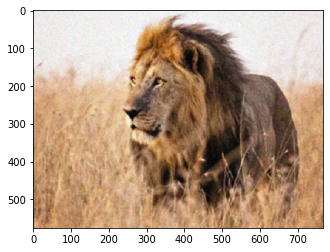

In [11]:
newImg = cv2.GaussianBlur(gimg, (5, 5), 3)
plt.imshow(newImg)

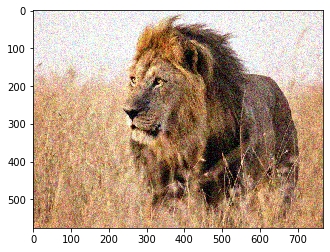

In [12]:
plt.imshow(gimg)

In [13]:
def filtrage2D(i):
    img7=cv2.filter2D(gimg, -1, np.array([[1 for i in range(3)] for j in range(3)], dtype = np.float) / i)
    plt.imshow(img7)

In [14]:
interact(filtrage2D, i=widgets.IntSlider(min=1, max=10, step=1, value=5))

interactive(children=(IntSlider(value=5, description='i', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.filtrage2D(i)>

In [30]:
def kmeans(k):
    (h1, w1) = newImg.shape[:2]

    image = cv2.cvtColor(newImg, cv2.COLOR_BGR2RGB)

    image = newImg.reshape(-1,3)

    clt = KMeans(n_clusters = k)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]

    #reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))
    plt.figure(figsize=(14,20))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(quant)
    return plt.show()

In [32]:
#interact(kmeans, k=widgets.IntSlider(min=1, max=10, step=1, value=2))

Image Segmentation using Contour Detection

In [33]:
img = cv2.imread('lion.jpg')
img1 = cv2.resize(img,(256,256))
gray = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

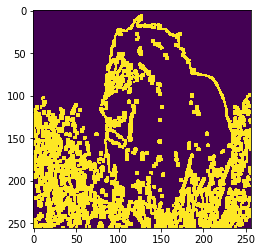

In [35]:
plt.imshow(edges)

In [55]:
def contour(k):
    cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
    mask = np.zeros((256,256), np.uint8)
    masked = cv2.drawContours(mask, [cnt],-1, 255, k)
    dst = cv2.bitwise_and(img, img, mask=mask)
    segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    plt.imshow(segmented)

In [57]:
interact(contour, k=widgets.IntSlider(min=-2, max=1, step=1, value=-1))

interactive(children=(IntSlider(value=-1, description='k', max=1, min=-2), Output()), _dom_classes=('widget-in…

<function __main__.contour(k)>

Image Segmentation using Thresholding

In [62]:
from skimage.filters import threshold_otsu
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh

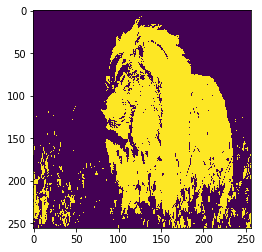

In [63]:
plt.imshow(img_otsu)